# Laboratory work 3 
## Variant 9

### 1. Modelling and solving linear programming problem:

### a. Choose assignment according to the number in the group journal
> 9. Using certain equipment, the enterprise can produce 400 products of type P1, or
100 products of type P2 per shift, the costs of each product are $18 and $54 per
unit. Make a production plan that would ensure maximum profit, if the painting
shop can process no more than 300 products of any type per shift.


### b. Describe the entered variables.
| Product | P1 | P2 | Amount |
| :--- | --- | --- | --- |
| per shift | 400 | 100 | 300 |
| Profit | 18 | 54 |  |

### c. Create a mathematical model of the problem.
\begin{equation}
    \bar F(x)=18x_1+54x_2\to max
\end{equation}

 \begin{cases}
   x_1\leq 400 
   \\
   x_2\leq 100
   \\
   x_1+x_2\leq 300,
   \\
   x_1,x_2\geq 0
 \end{cases}

### d. Find the solution using graphical representation of linear programming problem. The figure should contain lines with their equations, shaded halfplane that satisfy the original inequalities, the feasible region, the point of optimal solution, level curve.

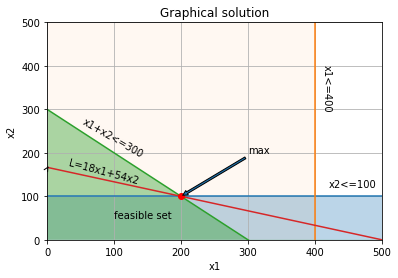

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def L(x1):
    return (9000-18*x1)/54


def a3(x1):
    return 300-x1

x1 = np.arange(0, 1000, 1)
plt.axis([0,500,0,500])
plt.grid(True)

plt.plot([0,600],[100,100])
plt.fill_between([0,600],[100,100], alpha=0.3)

plt.plot([400,400],[0,600])
plt.fill_between([0,400],[600,600], alpha=0.05)

plt.plot(x1,a3(x1))
plt.fill_between(x1,a3(x1), alpha=0.4)

plt.plot(x1,L(x1))

plt.plot(200,100,'ro')

plt.annotate('max',xy=(200,100),xytext=(300,200),arrowprops=dict(arrowstyle='simple'))
plt.annotate('', xy=(2,L(2)+3),xytext=(1,L(1)), arrowprops=dict(arrowstyle='->'))

plt.text(100,50,"feasible set")
plt.text(410,300,'x1<=400', rotation=-90)
plt.text(420,120,'x2<=100')
plt.text(50,190,'x1+x2<=300', rotation=-30)
plt.text(30,130,'L=18x1+54x2', rotation=-15)

plt.title('Graphical solution')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### e. Solve the problem using scipy.optimize.

In [6]:
import sys
!{sys.executable} -m pip install scipy.optimize

ERROR: Could not find a version that satisfies the requirement scipy.optimize (from versions: none)
ERROR: No matching distribution found for scipy.optimize


In [26]:
from scipy.optimize import linprog
import time
start=time.time()
Fc=[-18.0,-54.0]
A=[[1.0,0.0],
  [0.0,1.0],
  [1.0,1.0]]
B=[400.0,100.0,300.0]
x1_bounds=(0,None)
x2_bounds=(0,None)
res=linprog(Fc, A_ub=A, b_ub=B,bounds=[x1_bounds,x2_bounds])
print(res)
stop=time.time()
scipy_time = stop-start
print("Time :"+str(scipy_time))

     con: array([], dtype=float64)
     fun: -8999.999920706574
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.00000002e+02, 9.02401752e-07, 2.60038689e-06])
  status: 0
 success: True
       x: array([199.9999983,  99.9999991])
Time :0.006980180740356445


### f. Solve the problem using pulp.LpProblem.

In [16]:
import sys
!{sys.executable} -m pip install -U git+https://github.com/coin-or/pulp

  Cloning https://github.com/coin-or/pulp to c:\users\karina\appdata\local\temp\pip-req-build-d17cuavx
  Created wheel for PuLP: filename=PuLP-2.3.1-py3-none-any.whl size=40576172 sha256=a20d7795987d0ef05e20dd07288395854704d9ab42871941b5e85203027fe5c7
  Stored in directory: C:\Users\karina\AppData\Local\Temp\pip-ephem-wheel-cache-jf__2a7u\wheels\61\d5\55\f728ef0e5aff5e8ff291c4257c888197b56b236e75a286ae08
Successfully built PuLP


In [27]:
from pulp import *
import time
start=time.time()
x1=pulp.LpVariable("x1",lowBound=0)
x2=pulp.LpVariable("x2",lowBound=0)
problem=pulp.LpProblem('0',LpMaximize)
problem+= 18*x1+54*x2
problem+= x1<=400
problem+= x2<=100
problem+= x1+x2<=300
problem.solve()
print("Result:")
for variable in problem.variables():
    print(variable.name," = ",variable.varValue)
print("Income: " +str(value(problem.objective)))
stop=time.time()
pulp_time = stop-start
print("Time :"+str(pulp_time))

Result:
x1  =  200.0
x2  =  100.0
Income: 9000.0
Time :0.016955137252807617


### g. Compare solutions using np.allclose().

In [25]:
import numpy as np
np.allclose(-res.fun, pulp.value(problem.objective))

True

### h. Compare the time to solve the problem using scipy.optimize and pulp.LpProblem.

In [28]:
pulp_time > scipy_time

True

## 2. Solving transportation problem.

> Transportation problem: There are 5 destinations (in columns) where the
products/goods are to be delivered from different 4 sources (in rows). aiis the supply form each source; bi is the demand of each destination; cij is the cost when the product is delivered from i th source to j th destination. Find a transportation plan that will provide all customers  with the necessary goods at the lowest cost.

### a. Describe the entered variables.

| i/j | 1 | 2 | 3 | 4 | 5 | ai |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 19 | 4 | 7 | 10 | 9 | 85 |
| 2 | 4 | 5 | 11 | 3 | 14 | 110 |
| 3 | 15 | 10 | 6 | 5 | 9 | 65 | 
| 4 | 12 | 8 | 9 | 8 | 5 | 80 |
| bi | 90 | 70 | 70 | 60 | 50 |340  |

### c. Solve the problem using scipy.optimize.

In [31]:
from scipy.optimize import linear_sum_assignment
AI = 4
BI = 5

cost = np.array([[19,4,7,10,9],[4,5,11,3,14],[15,10,6,5,9],[12,8,9,8,5]])
demand = np.array([85,110,65,80]) # b_eq
capacity = np.array([90,70,70,60,50])# b_ub

A_eq = np.zeros(AI*BI*AI).reshape(AI, AI*BI)
# Constraint for each source, sum over the available destinations
for l in range(AI):
    for var in range(l*BI, l*BI+BI):
        A_eq[l, var] = 1

A_ub = np.zeros(BI*AI*BI).reshape(BI, AI*BI)
# Constraint for each destinations, sum over the sources
for c in range(BI):
    for var in range(c, AI*BI, BI):
        A_ub[c, var] = 1

%time tp_res = linprog(cost.flatten(), A_eq=A_eq, b_eq=demand, A_ub=A_ub, b_ub=capacity, method='revised simplex')
print(tp_res)
print(tp_res.x.reshape(AI, BI))

Wall time: 6.94 ms
     con: array([0., 0., 0., 0.])
     fun: 1675.0
 message: 'Optimization terminated successfully.'
     nit: 19
   slack: array([0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([ 0., 70., 15.,  0.,  0., 90.,  0.,  0., 20.,  0.,  0.,  0., 25.,
       40.,  0.,  0.,  0., 30.,  0., 50.])
[[ 0. 70. 15.  0.  0.]
 [90.  0.  0. 20.  0.]
 [ 0.  0. 25. 40.  0.]
 [ 0.  0. 30.  0. 50.]]
